In [24]:
# ------------------------------------------------------
#          1. Linear Congruential Generator (LCG)
# ------------------------------------------------------
def lcg(seed = 123):
    """
    Simple LCG using Park-Miller values.
    Each call updates seed and returns a U(0,1) random number.
    """
    a = 16807
    m = 2**31 - 1
    seed = (a * seed) % m
    return seed, seed / m


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from basic_operations import mean, var, std

# Calculating $\int_{0}^{\pi} \sin(x) \, dx = 2$

In [85]:
# Initializaion
a,b = 0,np.pi # limits
N = int(1e3) # no. of samples
seed = 123 
xrand = np.zeros(N) # array of samples

for i in range(len(xrand)):
    seed, xrand[i] =  lcg(seed)
    xrand[i]  = a + (b-a) * xrand[i]

In [27]:
# function to integrate
def func(x):
    return np.sin(x)

$$
 \frac{b-a}{N} \sum_{i=1}^{N} f(x_i) = \int_{a}^{b} f(x) \, dx
$$

In [28]:
integral = 0
for i in range(N):
    integral += func(xrand[i])

answer = (b-a)/float(N) * integral
print(answer)

1.9632388765239803


----


# $I = \int_{0}^{1} \frac{4}{1 + x^2} \, dx = \pi$

In [ ]:
def func(x):
    return 4 / (1 + x**2)

a,b = 0,1 # limits of integration
integral = 0
N = int(1e3) # no of sampled points

xrand = np.zeros(N) # stores sampled points
f_values = np.zeros(N) # stores f(x) for each point

# populating xrand
for i in range(len(xrand)):
    seed, xrand[i] =  lcg(seed)
    xrand[i]  = a + (b-a) * xrand[i]

# populating f_values
for i in range(N):
    f_values[i] = func(xrand[i])


integral = np.mean(f_values) * (b-a)
print("Integral: ", integral)

Integral:  3.1428761137248467


In [62]:
standard_error = np.sqrt(np.var(f_values))/np.sqrt(N)
confidence_interval = [integral - 2.576 * standard_error, integral + 2.576 * standard_error]
abs_error = np.abs(integral - np.pi)
print("Standard error: ", standard_error)
print("confidence_interval: ", confidence_interval)
print("absolute error: ", abs_error)

Standard error:  0.00643401409817871
confidence_interval:  [3.126302093407938, 3.159450134041755]
absolute error:  0.001283460135053538


### Evaluating for different values of N

In [ ]:
a,b = 0, 1
integral = 0
integral_vals = []
N_vals = [1e3, 1e4, 1e5,1e6]
margins = []
se_squared = []
variances = []


for i in N_vals:
    N = int(i)

    xrand = np.zeros(N)
    f_values = np.zeros(N)

    for i in range(len(xrand)):
        seed, xrand[i] =  lcg(seed)
        xrand[i]  = a + (b-a) * xrand[i]

    for i in range(N):
        f_values[i] = func(xrand[i])


    integral = np.mean(f_values) * (b-a)
    standard_error = np.sqrt(np.var(f_values))/np.sqrt(N) * (b-a)
    confidence_interval = [integral - 2.576 * standard_error, integral + 2.576 * standard_error]
    abs_error = np.abs(integral - np.pi)
    integral_vals.append(integral)
    margins.append(2.576 * standard_error)
    variances.append(np.var((f_values)))
    se_squared.append(standard_error**2)



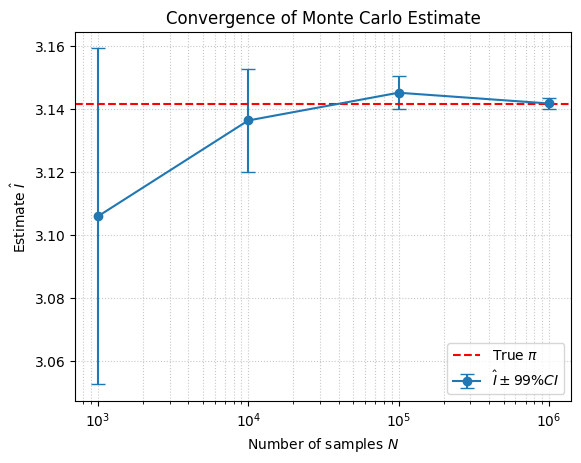

In [75]:
# Plot the error bars
# fmt='-o' connects points with a line and uses circle markers
# capsize=5 adds the horizontal lines at the top/bottom of the error bars
plt.errorbar(N_vals, integral_vals, yerr=margins, fmt='-o', 
             capsize=5, label=r'$\hat{I} \pm 99\% CI$')

# Plot the True Pi reference line
plt.axhline(y=np.pi, color='r', linestyle='--', label=r'True $\pi$')

# 5. Formatting to match the screenshot
plt.xscale('log') # Logarithmic X-axis for 10^3, 10^4...
plt.xlabel(r'Number of samples $N$')
plt.ylabel(r'Estimate $\hat{I}$')
plt.title('Convergence of Monte Carlo Estimate')
plt.grid(True, which="both", linestyle=':', alpha=0.7) # Dotted grid lines
plt.legend()

plt.show()

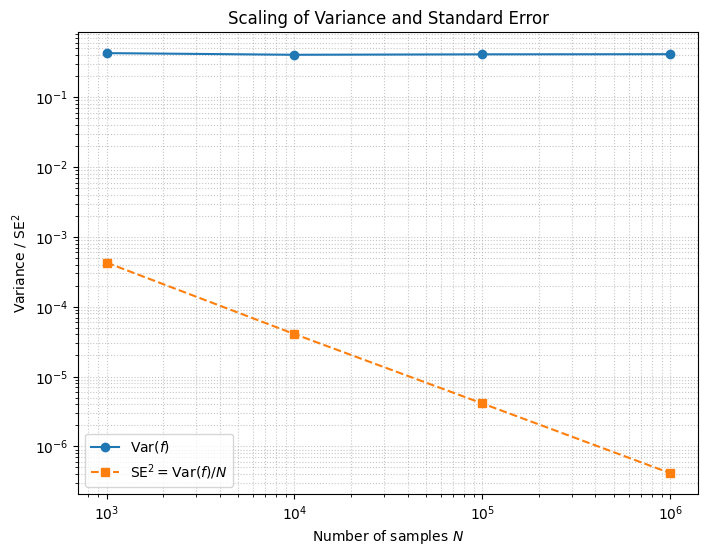

In [77]:
# 4. Plotting
plt.figure(figsize=(8, 6))

# Use loglog for both axes as shown in the screenshot
plt.loglog(N_vals, variances, 'o-', label=r'Var($f$)')
plt.loglog(N_vals, se_squared, 's--', label=r'SE$^2 = \mathrm{Var}(f)/N$')

# 5. Formatting
plt.xlabel(r'Number of samples $N$')
plt.ylabel(r'Variance / SE$^2$')
plt.title('Scaling of Variance and Standard Error')
plt.grid(True, which="both", linestyle=':', alpha=0.7)
plt.legend()

plt.show()

----

## 6-d Integration

$g(\mathbf{X}) = \exp\left( - \sum_{k=0}^{5} x_k^2 - \frac{1}{2} \sum_{k=0}^{2} (x_k - x_{k+3})^2 \right), \qquad \mathbf{X} \in [-5, 5]^6.$

$\text{True value (approx): } I_{6D}^{\text{true}} = \frac{\pi^3\sqrt{2}}{4} \approx 10.966.$

$\hat{I}_{6D} = V_C \, \overline{g}, \qquad \text{SE} = V_C \frac{s_g}{\sqrt{N}}.$

In [ ]:
import numpy as np

# --- 1. LCG Function ---
def lcg(seed):
    a = 16807
    m = 2**31 - 1
    seed = (a * seed) % m
    return seed, seed / m

# --- 2. The 6D Function g(x) ---
def g(x):
    # x is an array of size 6
    # Term 1: Sum of squares x_k^2 for k=0 to 5
    term1 = sum(x**2)
    
    # Term 2: Sum of (x_k - x_{k+3})^2 for k=0 to 2
    term2 = (x[0] - x[3])**2 + (x[1] - x[4])**2 + (x[2] - x[5])**2
    
    return np.exp(-term1 - 0.5 * term2)

# --- 3. Setup ---
a_lim, b_lim = -5, 5 # limits of integral
d = 6 # dimensions
vol = (b_lim - a_lim)**d  # Volume of the 6D hypercube (10^6)
true_val = 10.966         # Given in problem
seed = 123456

N_vals = [1e4, 1e5, 1e6]

print(f"{'N':<9} {'Estimate':<10} {'SE':<10} {'95% CI':<20} {'Rel Error':<10} {'R (Ratio)'}")
print("-" * 85)

for n_val in N_vals:
    N = int(n_val)
    
    # Pre-allocate
    g_values = np.zeros(N)
    
    # --- Generation & Evaluation Loop ---
    for i in range(N):
        # Generate 6 random numbers
        x_point = np.zeros(d)
        for j in range(d):
            seed, u = lcg(seed)
            # SCALE CORRECTLY: a + (b-a)*u
            x_point[j] = a_lim + (b_lim - a_lim) * u
            
        g_values[i] = g(x_point)

    # --- Statistics ---
    # Mean of g
    mean_g = mean(g_values)
    
    # Integral Estimate = Volume * Mean
    I_hat = vol * mean_g
    
    # Variance of g (sample variance)
    var_g = var(g_values, ddof=1)
    
    # Standard Error = Volume * sqrt(Var(g) / N)
    SE = vol * np.sqrt(var_g / N)
    
    # 95% CI (Z = 1.96)
    z_score = 1.96
    ci_lower = I_hat - z_score * SE
    ci_upper = I_hat + z_score * SE
    
    # Relative Error
    rel_error = np.abs(I_hat - true_val) / true_val

    # --- Task 2: Efficiency Ratio R ---
    # E[g^2] approx mean(g^2)
    E_g2 = np.mean(g_values**2)
    # E[g]^2 approx mean(g)^2
    E_g_sq = mean_g**2
    
    # R = E[g^2] / E[g]^2
    # Note: If mean_g is very close to 0, this might be unstable, 
    # but for this integral it should be fine.
    R = E_g2 / E_g_sq

    # Output Row
    print(f"{int(N):<9} {I_hat:<10.4f} {SE:<10.4f} [{ci_lower:.3f}, {ci_upper:.3f}]   {rel_error:<10.4f} {R:.2f}")

N         Estimate   SE         95% CI               Rel Error  R (Ratio)
-------------------------------------------------------------------------------------
10000     3.5904     1.5980     [0.458, 6.723]   0.6726     1981.85
100000    9.5589     2.7866     [4.097, 15.021]   0.1283     8499.04
1000000   12.0905    1.2392     [9.662, 14.519]   0.1025     10506.18


----

## n - Sphere Volume 

In [2]:
def g(x):
    r_2 = np.sum(x**2)
    return 1 if r_2 <= 1 else 0

In [ ]:
# --- 3. Setup ---
a_lim, b_lim = 0, 1 # limits of integral
d = 6 # dimensions
vol = (b_lim - a_lim)**d  # Volume of the 6D hypercube (10^6)
true_val = 1         # Given in problem
seed = 123456

N_vals = [1e4, 1e5, 1e6]

print(f"{'N':<9} {'Estimate':<10} {'SE':<10} {'95% CI':<20} {'Rel Error':<10} {'R (Ratio)'}")
print("-" * 85)

for n_val in N_vals:
    N = int(n_val)
    
    # Pre-allocate
    g_values = np.zeros(N)
    
    # --- Generation & Evaluation Loop ---
    for i in range(N):
        # Generate 6 random numbers
        x_point = np.zeros(d)
        for j in range(d):
            seed, u = lcg(seed)
            # SCALE CORRECTLY: a + (b-a)*u
            x_point[j] = a_lim + (b_lim - a_lim) * u
            
        g_values[i] = g(x_point)

    # --- Statistics ---
    # Mean of g
    mean_g = mean(g_values)
    
    # Integral Estimate = Volume * Mean
    I_hat = vol * mean_g
    print("I_hat : ", I_hat, "N = ", N)